<a href="https://colab.research.google.com/github/pmantoine4/PA_D_24/blob/main/MPG_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Task 1: Define the Problem

#Task 2a: Install the Needed Libraries

In [ ]:
!pip install scikit-learn


#Task 2b: Import the Needed Libraries

In [1]:
#Importing the necessary Librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pickle
import joblib
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


#Task 3: Load the Data

In [2]:
#Loading the dataset
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data', delim_whitespace=True) # Use delim_whitespace to handle whitespace as separator
data.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin', 'name']

#Task 4: Perform Data Exploratory Analysis (EDA)

##Show the data

In [65]:
#To show and understand the dataset
data.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,15.0,8,350.0,165.0,3693.0,11.5,70,1
1,18.0,8,318.0,150.0,3436.0,11.0,70,1
2,16.0,8,304.0,150.0,3433.0,12.0,70,1
3,17.0,8,302.0,140.0,3449.0,10.5,70,1
4,15.0,8,429.0,198.0,4341.0,10.0,70,1
5,14.0,8,454.0,220.0,4354.0,9.0,70,1
6,14.0,8,440.0,215.0,4312.0,8.5,70,1
7,14.0,8,455.0,225.0,4425.0,10.0,70,1
8,15.0,8,390.0,190.0,3850.0,8.5,70,1
9,15.0,8,383.0,170.0,3563.0,10.0,70,1


##Get Data Info

In [4]:
# Getting more info about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    float64
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.0+ KB


In [5]:
# Connfirming the number of rows and columns inn the dataset
data.shape

(397, 9)

In [63]:
# Geetting basic statistics of the data
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000
mean,23.459847,5.465473,194.124041,104.404092,2976.237852,15.550384,75.994885,1.578005
std,7.810128,1.703152,104.622462,38.518732,850.071941,2.756557,3.675975,0.806020
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2224.500000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,151.000000,93.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,264.500000,125.000000,3616.500000,17.050000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


##Find Missing Values

In [7]:
# Replacing '?' by 'NAN' inn the horspower column
data['horsepower']=data['horsepower'].replace('?',np.nan)

In [8]:
# Looking for missing values in the dataset. Six missing valuees are detected in the horsepower column
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

In [9]:
# updated info about the dataset. The horsepower column has 391 non-nuii values and the datype is object
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    391 non-null    object 
 4   weight        397 non-null    float64
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.0+ KB


#Task 5: Perform Data Cleaning

In [10]:
# Converting the horsepower column object datatype to nnumeric datatype
data['horsepower'] = pd.to_numeric(data['horsepower'], errors='coerce')

In [11]:
# Dropping the missing values in the dataset. We have opted to drop the missing values instead of using the inputing method because there are few of them.
data.dropna(inplace=True)

In [12]:
# Confirming that the horsepower column contains numerical values (float64) and the number of rows is reduced to 391 after the dropping process.
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 391 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           391 non-null    float64
 1   cylinders     391 non-null    int64  
 2   displacement  391 non-null    float64
 3   horsepower    391 non-null    float64
 4   weight        391 non-null    float64
 5   acceleration  391 non-null    float64
 6   year          391 non-null    int64  
 7   origin        391 non-null    int64  
 8   name          391 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 30.5+ KB


In [13]:
# Looking for duplicates in the dataset
data.drop_duplicates(inplace=True)

In [14]:
# There is no duplicate in the dataset, the nnumber of rows remaining the same (391) after running the previous code.
data.shape

(391, 9)

In [62]:
# Getting the descriptive statistics of the cleaned dataset
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000
mean,23.459847,5.465473,194.124041,104.404092,2976.237852,15.550384,75.994885,1.578005
std,7.810128,1.703152,104.622462,38.518732,850.071941,2.756557,3.675975,0.806020
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2224.500000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,151.000000,93.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,264.500000,125.000000,3616.500000,17.050000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


#Task 6: Visualize Cleaned up Dataset

<ipython-input-61-86658d8e3f03>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cylinders', data=data, palette='RdBu_r')


<Axes: xlabel='cylinders', ylabel='count'>

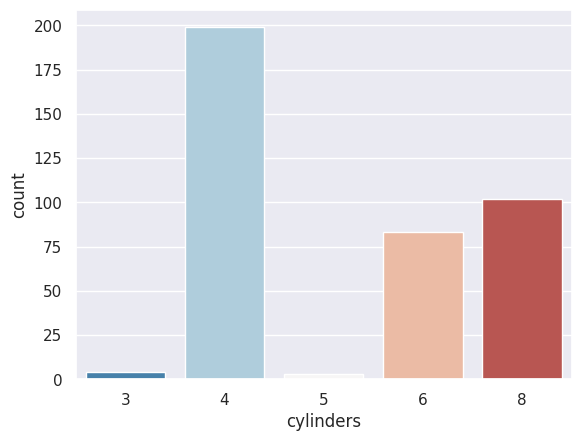

In [61]:
# Using seeaborn, a countplot of the cylinder column. The 4 cylinder cars are the most numerous in the dataset, almost 200.
sns.set_style('darkgrid')
sns.countplot(x='cylinders', data=data, palette='RdBu_r')

<Axes: ylabel='Frequency'>

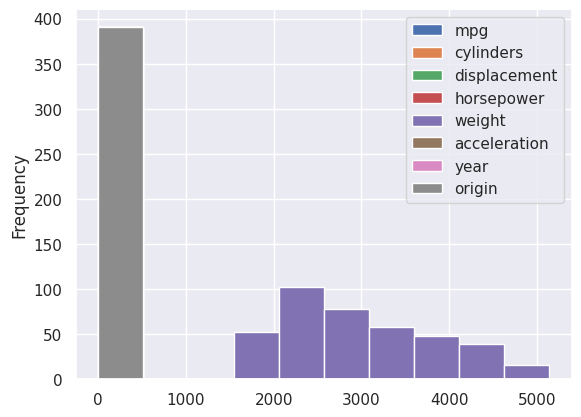

In [60]:
# A histogram kind plot of the dataset
data.plot(kind="hist")

array([[<Axes: title={'center': 'mpg'}>,
        <Axes: title={'center': 'cylinders'}>,
        <Axes: title={'center': 'displacement'}>],
       [<Axes: title={'center': 'horsepower'}>,
        <Axes: title={'center': 'weight'}>,
        <Axes: title={'center': 'acceleration'}>],
       [<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'origin'}>, <Axes: >]], dtype=object)

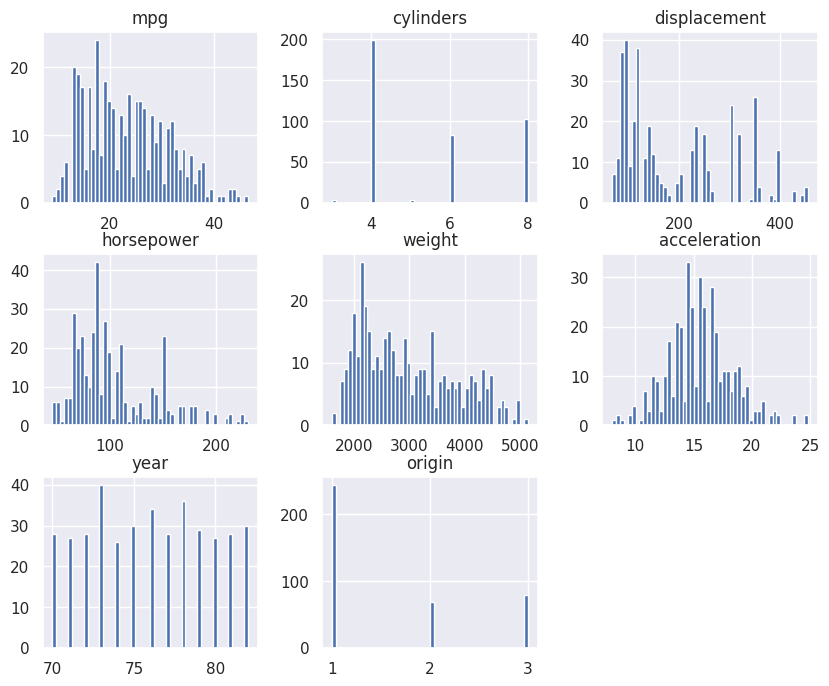

In [59]:
# A histogram of each column taken separately
data.hist(bins=50, figsize=(10,8))

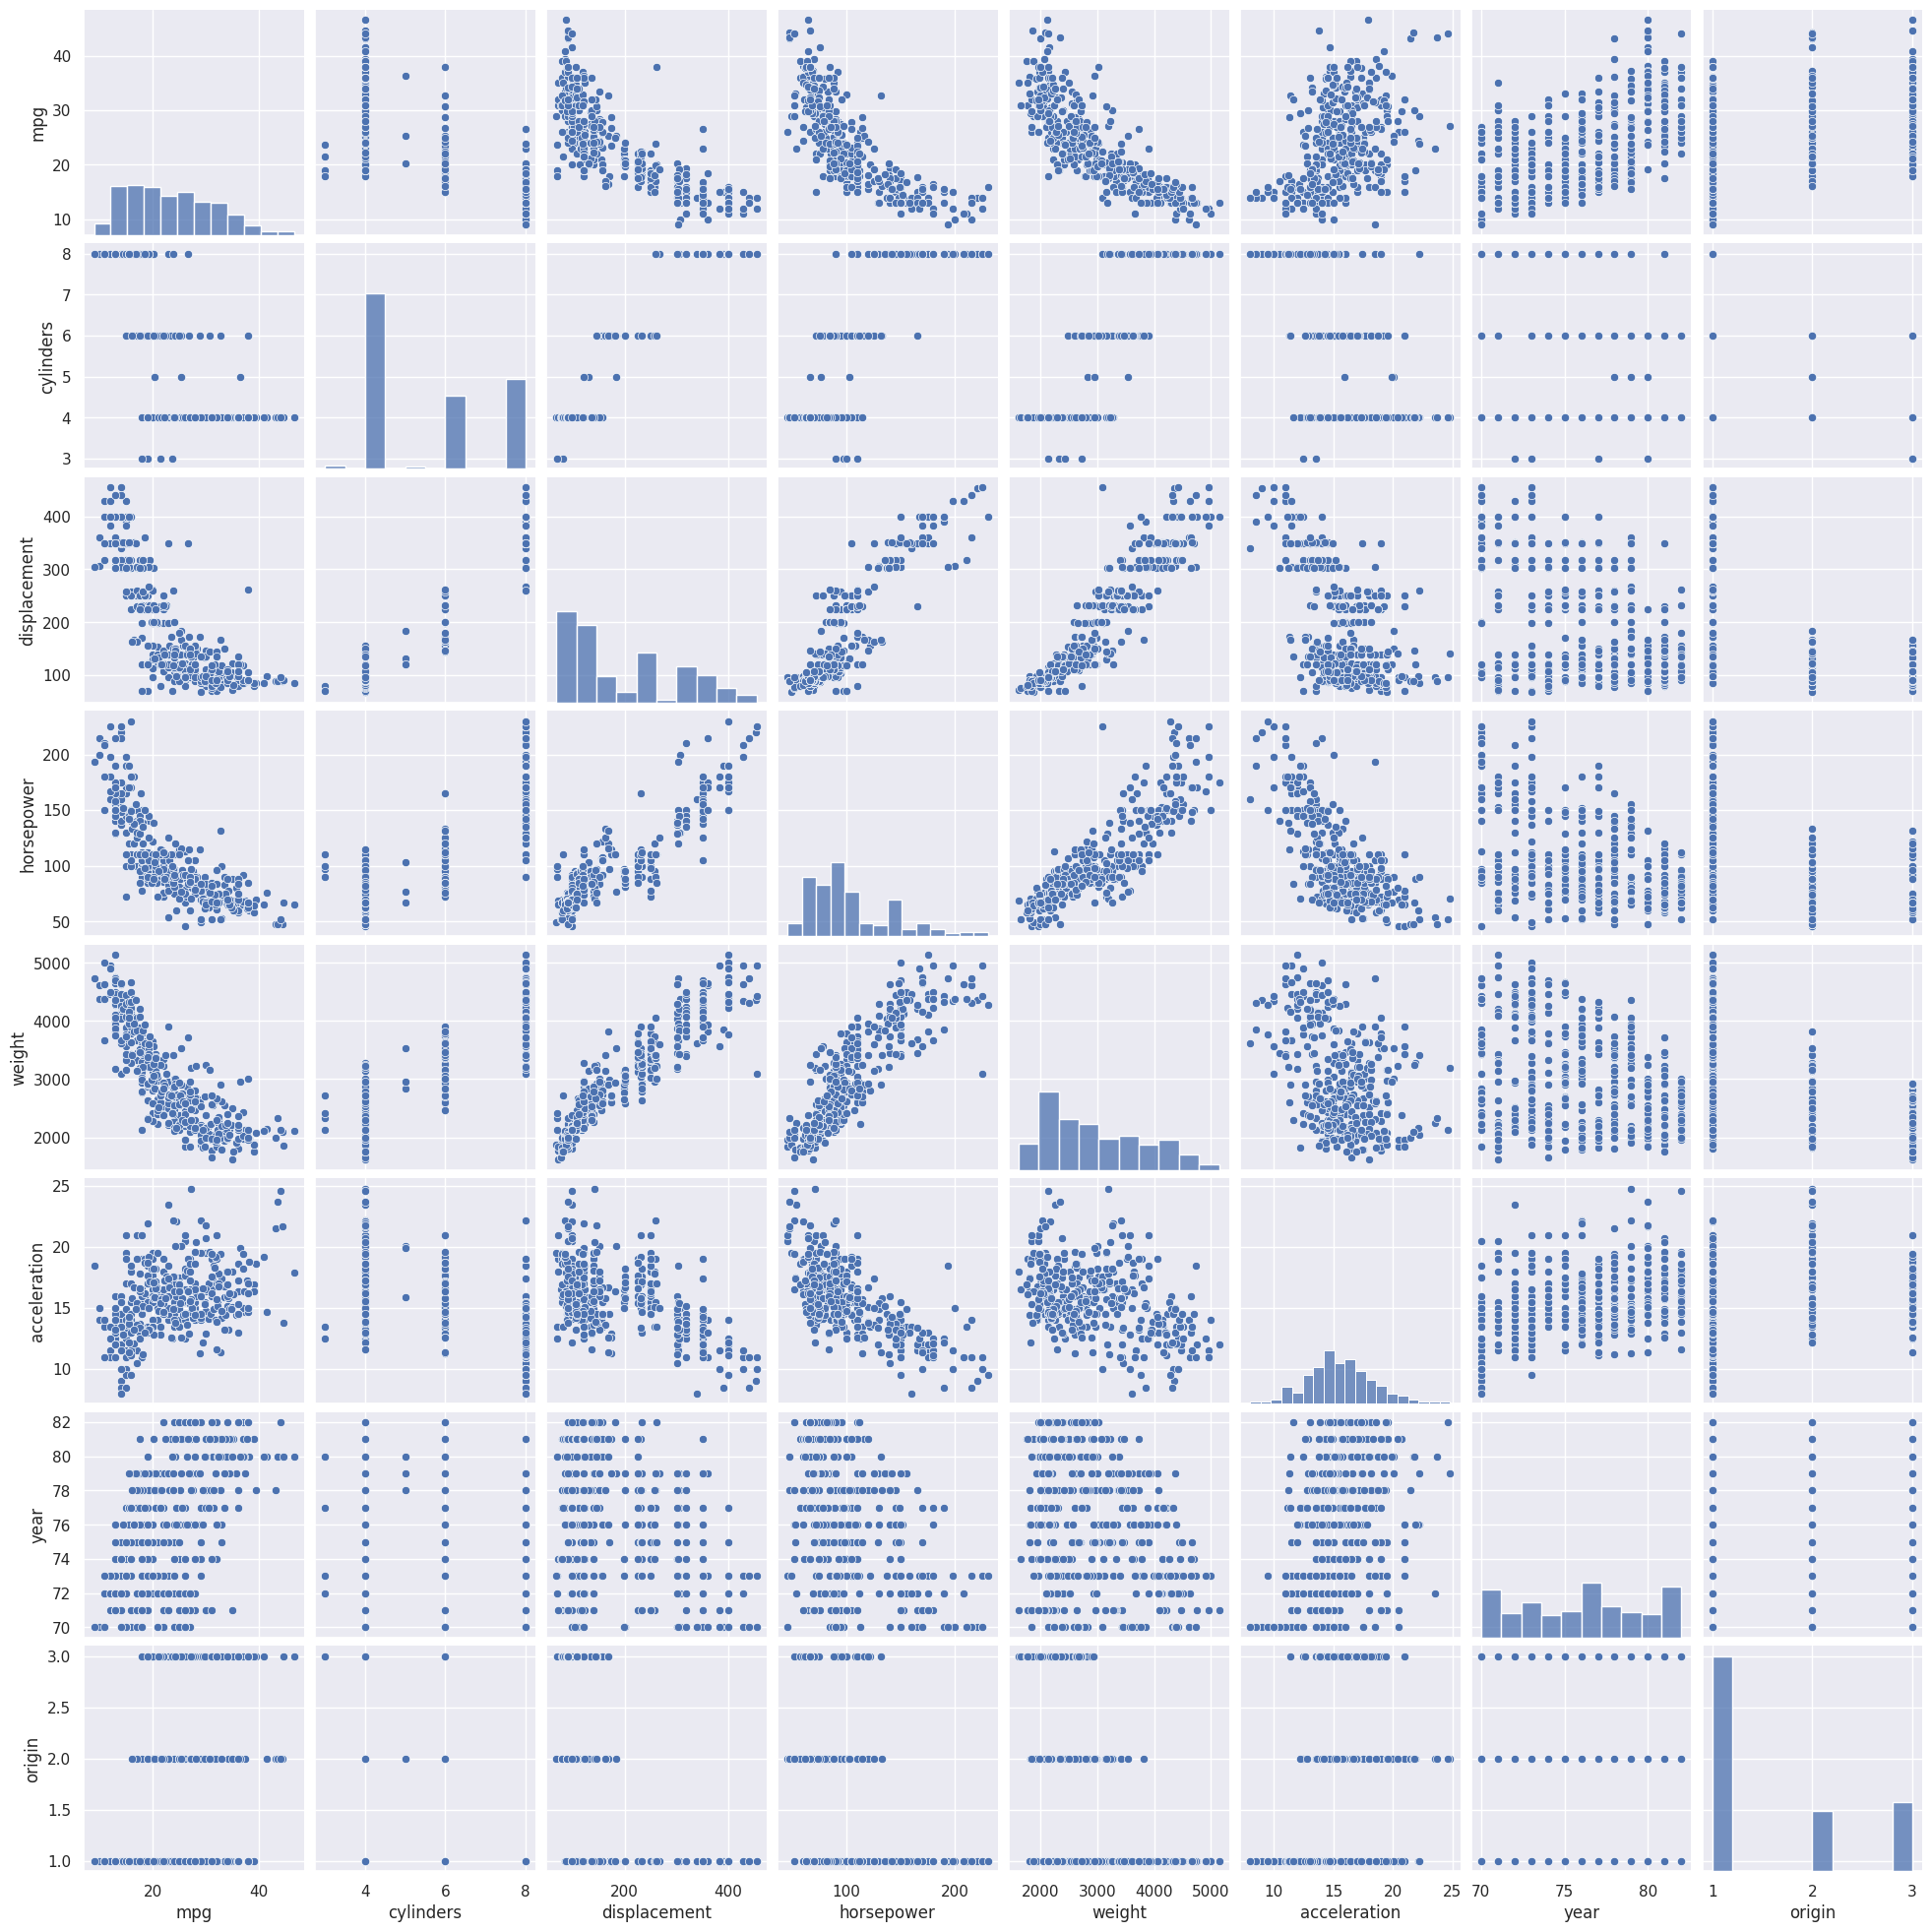

In [58]:
# Pairplot allows us to see both the distribution and the relationships between two variables. Our target column is mpg. Generally, it is observed that  the mpg increases when variablees like displacement, horsepower, and weight decrease (negative correlation). It's different in the case of accelaration.
sns.pairplot(data)

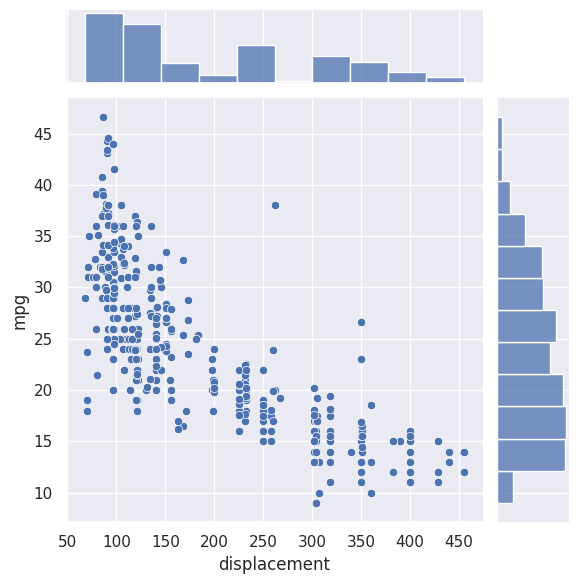

In [57]:
# A jointplot of mpg VS displacement (negative correlation)
sns.jointplot(x='displacement', y='mpg', data=data)

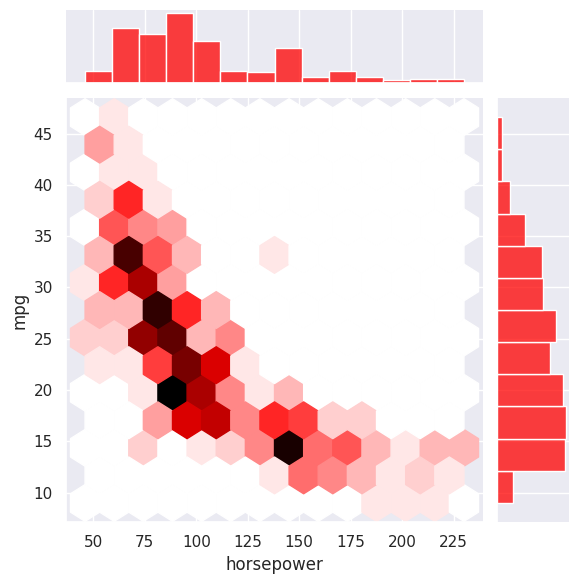

In [56]:
# A jointplot of mpg VS horsepower
sns.jointplot(x='horsepower', y='mpg', data=data, kind='hex', color='red')

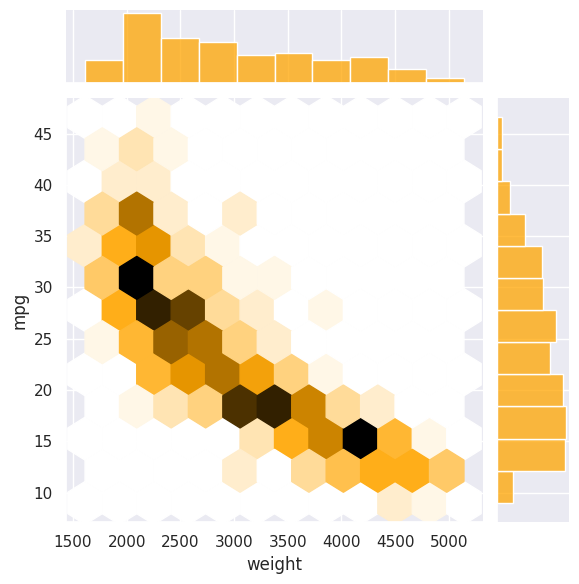

In [55]:
# A jointplot of.  mpg VS. weight
sns.jointplot(x='weight', y='mpg', data=data, kind='hex', color='orange')

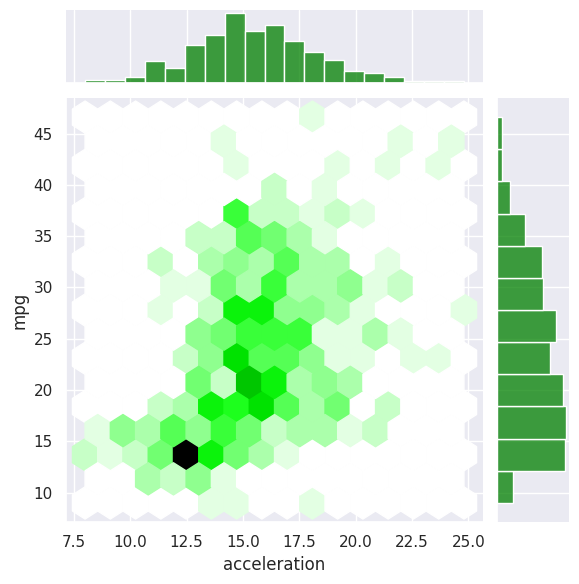

In [54]:
# A jointplot of mpg VS acceleration
sns.jointplot(x='acceleration', y='mpg', data=data, kind='hex', color='green')

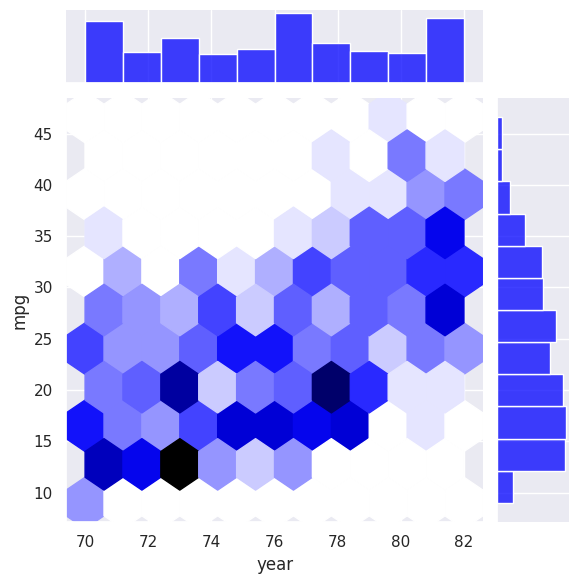

In [53]:
# A jointplot of mpg VS year
sns.jointplot(x='year', y='mpg', data=data, kind='hex', color='blue')

<Axes: xlabel='weight', ylabel='mpg'>

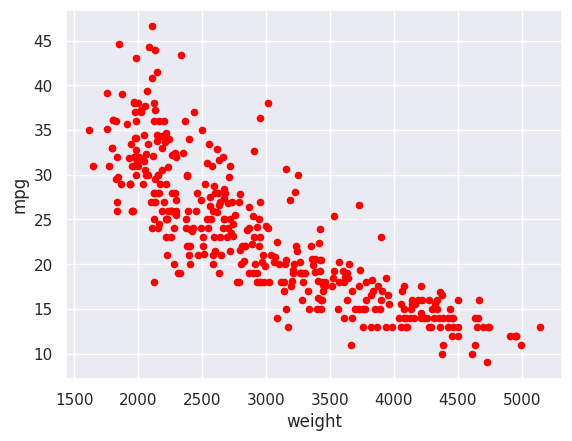

In [52]:
# A scatter plot of mpg VS weight
data.plot(kind='scatter', x='weight', y='mpg', color='red')

#Task 7: Conceptualize the problem

#Task 8: Perform Data-Split

In [26]:
# Dropping the name column from the dataset.  It will not be used in the analysis.
data.drop('name', axis=1, inplace=True)

In [27]:
# Performing the data-split
x = data.drop('mpg', axis=1)
y = data['mpg']

In [50]:
type(x)

pandas.core.frame.DataFrame

In [51]:
type(y)

pandas.core.series.Series

In [30]:
 x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

#Task 9: Choose the ML Method to follow

In [31]:
# We use !pip install xgboost to install the neceessary library
# We import XGBRegressor class from the xgboost module to make it available for use
!pip install xgboost    #
from xgboost import XGBRegressor

In [42]:
# To. connect drive to the notebook
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [32]:
# Choosing the ML models.
# The  models: Linear Regression, Decision Tree Regressor, Random Forest Regressor, and XGBRegressor are appropriate for regression tasks with continuous target values. The LogisticRegression_model is not suitable for the continuous target variable, it's used for classification.

Linear_model = LinearRegression()
DecisionTree_model = DecisionTreeRegressor()
RandomForest_model = RandomForestRegressor()
XGBRegressor_model = XGBRegressor()


#Task 10: Train the ML Model

In [33]:
# Training the models
models = [Linear_model, DecisionTree_model, RandomForest_model, XGBRegressor_model]
for model in models:
  model.fit(x_train, y_train)
  print(f'{model} is trained!')

LinearRegression() is trained!
DecisionTreeRegressor() is trained!
RandomForestRegressor() is trained!
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) is trained!


In [34]:
# Defining the accuracy for each model
Accuracy_LinearRegression = Linear_model.score(x_test, y_test)
Accuracy_DecisionTree = DecisionTree_model.score(x_test, y_test)
Accuracy_RandomForest = RandomForest_model.score(x_test, y_test)
Accuracy_XGBRegressor = XGBRegressor_model.score(x_test, y_test)

In [35]:
# To obtain the accuracy for each model
models = [Linear_model, DecisionTree_model, RandomForest_model, XGBRegressor_model]  # Use the actual model objects
model_names = ['LinearRegression', 'DecisionTree', 'RandomForest','XGBRegressor'] # Create a list of corresponding model names

for model, name in zip(models, model_names):
  print(f'{name} accuracy is {model.score(x_test, y_test)}') # Print the name and score

LinearRegression accuracy is 0.8046791700937073
DecisionTree accuracy is 0.7662922195380304
RandomForest accuracy is 0.8979232483888904
XGBRegressor accuracy is 0.8804849947584588


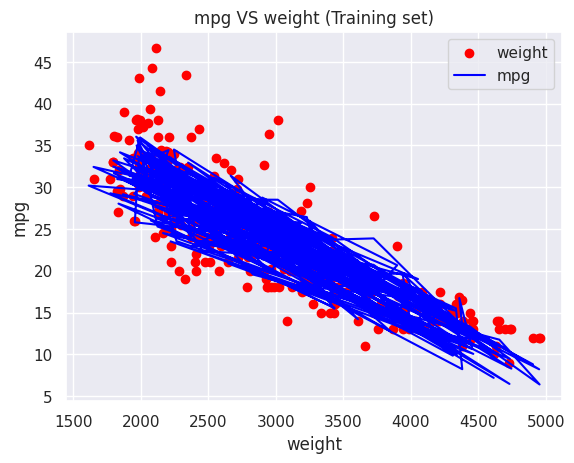

In [49]:
# Visualizing the training set
plt.scatter(x_train['weight'], y_train, color = "red", label='weight') # Select the 'weight' column from x_train
plt.title("mpg VS weight (Training set)")
plt.xlabel("weight")
plt.ylabel("mpg")
# Use x_train (all 7 features) to make predictions, then extract predictions corresponding to the 'weight' column
predictions = Linear_model.predict(x_train)
plt.plot(x_train['weight'], predictions, color = "blue", label='mpg')
plt.legend()
plt.show()

#Task 11: Test the Model

---



---



---



In [36]:
# Testing the models (first step)
test_x = np.zeros((1,7))
test_x

array([[0., 0., 0., 0., 0., 0., 0.]])

In [37]:
# Testing the models (second step)
test_x[0,0] = 6       # cylinders -- int64
test_x[0,1] = 200     # displacement -- float64
test_x[0,2] = 85      # horsepower -- float64
test_x[0,3] = 2587    # weight -- float64
test_x[0,4] = 16      # acceleration -- float64
test_x[0,5] = 70      # year -- int64
test_x[0,6] = 1       # origin -- int64


In [39]:
test_x

array([[6.000e+00, 2.000e+02, 8.500e+01, 2.587e+03, 1.600e+01, 7.000e+01,
        1.000e+00]])

In [40]:
# Testing the models (third step). Msaking predictions.
models = [Linear_model, DecisionTree_model, RandomForest_model, XGBRegressor_model]
for model in models:
  prediction = model.predict(test_x)
  print(f'The model {model} predicts for a car a mpg  of {round(float(prediction[0]),2)}')


The model LinearRegression() predicts for a car a mpg  of 21.47
The model DecisionTreeRegressor() predicts for a car a mpg  of 21.0
The model RandomForestRegressor() predicts for a car a mpg  of 21.8
The model XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) predicts for a car a mpg  of 20.95


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [45]:
# Using the pickle library/method
pickle.dump(Linear_model, open('/content/drive/MyDrive/Classroom/Data Science: Predictive Analytics Cohort 6/Spring 2024 - Predictive Analytics/Projects/MPG Prediction/model.pkl', 'wb'))

In [42]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [66]:
"""
The pickle library/method takes a number of parameters,
1.  the thing we want to save
2.  the place in which we want to save whatever it is that we want to save
3.  the mode for the method to access the file and place for the save.
"""

'\nThe pickle library/method takes a number of parameters,\n1.  the thing we want to save\n2.  the place in which we want to save whatever it is that we want to save\n3.  the mode for the method to access the file and place for the save.\n'